[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/cumulative_distribution.ipynb)

In [0]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

In [2]:
sp.pi

3.142

In [3]:
sp.exp(1)

2.718

In [4]:
x=3
mu=4
sigma=0.8
1/(sp.sqrt(2*sp.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))

0.228

In [5]:
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.228

In [6]:
norm_dist=stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.228

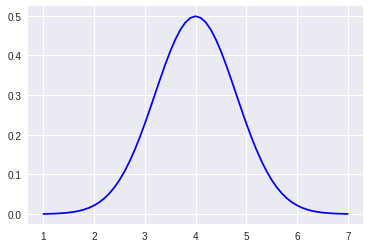

In [7]:
x_plot=np.arange(start=1,stop=7.1,step=0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='blue')

In [8]:
np.random.seed(1)
simulated_sample=stats.norm.rvs(loc=4,scale=0.8,size=100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [9]:
sp.sum(simulated_sample<=3)

10371

In [10]:
sp.sum(simulated_sample<=3)/len(simulated_sample)

0.104

In [14]:
stats.norm.cdf(loc=4,scale=0.8,x=3)

0.106

In [15]:
stats.norm.cdf(loc=4,scale=0.8,x=4)

0.500

In [16]:
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.432

In [17]:
shitagawa=stats.norm.cdf(loc=4,scale=0.8,x=3)
stats.norm.ppf(loc=4,scale=0.8,q=shitagawa)

3.000

In [19]:
stats.norm.ppf(loc=4,scale=0.8,q=0.5)

4.000

In [0]:
np.random.seed(1)
t_value_array=np.zeros(10000)
norm_dist=stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
  sample=norm_dist.rvs(size=10)
  sample_mean=sp.mean(sample)
  sample_std=sp.std(sample,ddof=1)
  sample_se=sample_std/sp.sqrt(len(sample))
  t_value_array[i]=(sample_mean-4)/sample_se

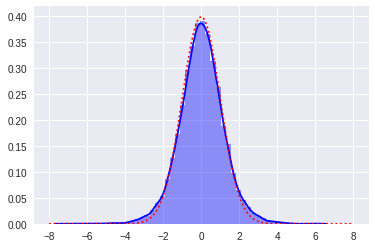

In [22]:
sns.distplot(t_value_array,color='blue')
x=np.arange(start=-8,stop=8.1,step=0.1)
plt.plot(x,stats.norm.pdf(x=x),color='red',linestyle='dotted')

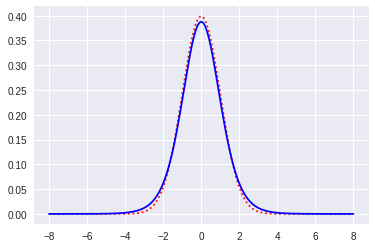

In [23]:
plt.plot(x,stats.norm.pdf(x=x),color='red',linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=9),color='blue')

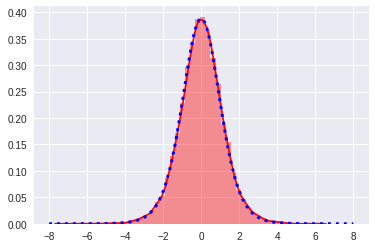

In [27]:
sns.distplot(t_value_array,color='red',norm_hist=True)
plt.plot(x,stats.t.pdf(x=x,df=9),color='blue',linestyle='dotted',linewidth=3)